<a href="https://colab.research.google.com/github/IrmaGalijasevic/DataAnalysis/blob/main/ProjectTask2/VIS23_Z2_TIM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALIZA SLEEP HEALTH AND LIFESTYLE DATASETA**

**ƒålanovi grupe su zajedno radili na izradi zadataka.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import os
import re
import io
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import chi2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (11).csv


In [ ]:
dataset = pd.read_csv(io.BytesIO(uploaded['Sleep_health_and_lifestyle_dataset.csv']))
data1 = dataset.copy()

U sklopu ove zadaƒáe, odabrali smo dataset koji nas je kao studente najvi≈°e interesovao, a rijeƒç je o podacima vezanim za utjecaj sna na kvalitet ≈æivota. Kroz analizu ovog dataseta, ≈æelimo istra≈æiti razliƒçite faktore koji mogu utjecati na kvalitetu sna, kao i identificirati povezanosti s drugim zdravstvenim i ≈æivotnim navikama.

Tokom obrade podataka bavit ƒáemo se deskriptivnom statistikom, ispitivanjem intervala pouzdanosti, postavljanjem hipoteza, ispitivanjem distribucija...



# **UVOD**

Skup podataka se sastoji od 12 atributa, kako numeriƒçkih, tako i kategoriƒçkih, koji pru≈æaju korisne informacije o ispitanicima. Neki od atributa su: du≈æina sna, nivo stresa, dob, spol, zanimanje i sl.

Primjer dijela dataseta, kao i broj instanci, se mo≈æe vidjeti ispod:

In [ ]:
dataset.head(8)

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   
5          6   Male   28     Software Engineer             5.9   
6          7   Male   29               Teacher             6.3   
7          8   Male   29                Doctor             7.8   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   
5                 4                       30             8        Obese   
6                 6                       40             7        Obese   
7                 7                       75             6       Normal   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea  
5         140/90          85         3000       Insomnia  
6         140/90          82         3500       Insomnia  
7         120/80          70         8000           None

In [ ]:
print(dataset.shape)

(374, 13)


Mo≈æemo provjeriti i sa kojim tipovima podataka radimo:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **ANALIZA DATASETA**

Kako je bolje razumijevanje podataka dataseta kljuƒçno za otkrivanje znaƒçajnih informacija i dono≈°enje ispravnih zakljuƒçaka, potrebno je bolje sagledati samu strukturu atributa. Sljedeƒái grafikoni nam omoguƒáavaju sveobuhvatan pregled dataseta i ola≈°avaju uoƒçavanje skrivenih uzoraka i karakteristika koje ƒáe nam pomoƒái u daljoj analizi.

Najbitnije ≈°to posmatramo pri analizi svakog pojedinaƒçnog atributa jeste naƒçin na koji su oni distribuirani i kako to mo≈æe utjecati na ostale varijable u datasetu.

Prvo ≈°to ispitujemo jeste da li je podjednak broj ≈æena i mu≈°karaca zastupljen u datasetu.  Vidimo da je pribli≈æno isti broj instanci za oba spola.

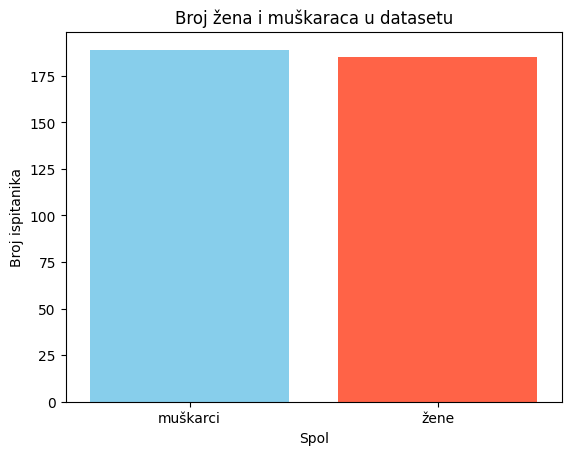

In [ ]:
# Izraƒçunavanje broja ≈æena i mu≈°karaca
gender_counts = dataset['Gender'].value_counts()

# Kreiranje bar plot-a
plt.bar(['mu≈°karci', '≈æene'], gender_counts.values, color=['skyblue', 'tomato'])
plt.xlabel('Spol')
plt.ylabel('Broj ispitanika')
plt.title('Broj ≈æena i mu≈°karaca u datasetu')
plt.xlim([-0.5, 1.5])
plt.show()

Sljedeƒáe ≈°to ≈æelimo ispitati jeste raspodjela instanci po starosnim dobima. Po≈°to je jedna od kolona u datasetu i zanimanje, pretpostavljamo da je vr≈°eno ispitivanje kvalitete sna na odraslim osobama, ali ƒáemo ispitati sve starosne grupe.

Sa bar plota mo≈æemo oƒçitati da su svi ispitanici pripadaju starosnim dobima 20-29, 30-39 i 40-59, kao ≈°to je i pretpostavljeno. Takoƒëer se vidi da je najvi≈°e ispitanika iz starosne grupe 30-39, ≈°to bi bila prosjeƒçna srednja dob ƒçovjeka.

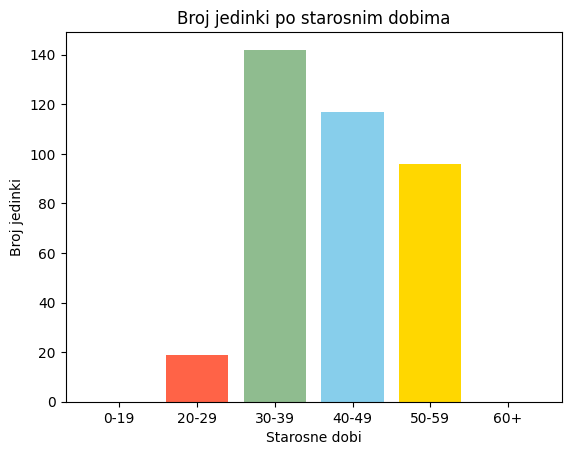

In [ ]:
# Podjela na starosne dobi
bins = [0, 19, 29, 39, 49, 59, dataset['Age'].max() + 1]
labels = ['0-19', '20-29', '30-39','40-49','50-59', '60+']
dataset['age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, include_lowest=True)

# Izraƒçunavanje broja jedinki po starosnim dobima
age_counts = dataset['age_group'].value_counts().sort_index()

# Kreiranje bar plot-a
plt.bar(age_counts.index, age_counts.values, color=['gold', 'tomato', 'darkseagreen', 'skyblue'])
plt.xlabel('Starosne dobi')
plt.ylabel('Broj jedinki')
plt.title('Broj jedinki po starosnim dobima')
plt.show()


Dalje smo ispitivali raspodjelu po kategoriƒçkim varijablama u datasetu. Sa sljedeƒáeg grafa vidimo da raspodjela prema kategorijama BMI takoƒëer nije ravnomjerna. Najveƒái dio dataseta ƒçine ispitanici s 'normalnom' vrijedno≈°ƒáu BMI, dok 'pretilih' ispitanika ima jako malo, ≈°to mo≈æe znaƒçajno utjecati na raspodjele ostalih atributa.

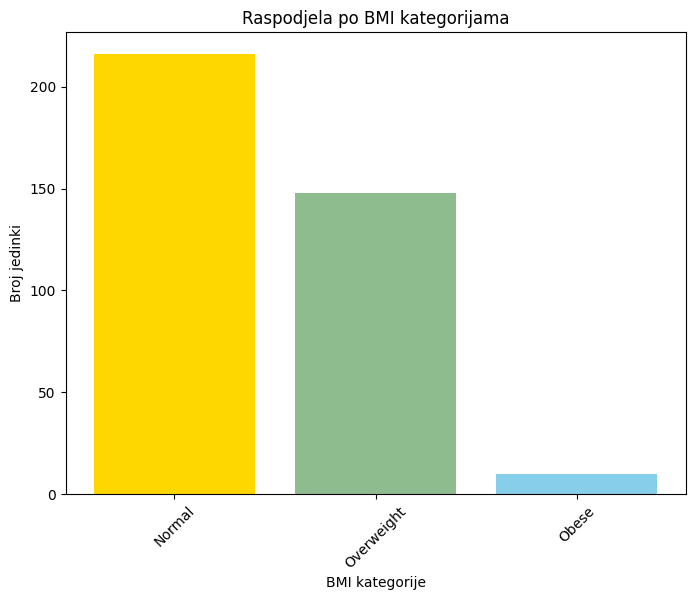

In [ ]:
data1['BMI Category'] = data1['BMI Category'].str.strip().replace({'Normal Weight': 'Normal'})
category_counts = data1['BMI Category'].value_counts()
category_counts = category_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

colors = ['gold', 'darkseagreen', 'skyblue']
plt.bar(category_counts.index, category_counts.values, color=colors)

plt.xlabel('BMI kategorije')
plt.ylabel('Broj jedinki')
plt.title('Raspodjela po BMI kategorijama')

plt.xticks(rotation=45)

plt.show()

Jo≈° jedan vrlo znaƒçajan atribut koji vrijedi istra≈æiti je zanimanje ispitanika ƒçija je raspodjela prikazana na sljedeƒáem plotu. Iz ovog grafika, kao i iz prethodnih analiza, primjeƒáujemo da postoji neravnomjerna raspodjela i odreƒëena pristranost prema odreƒëenim zanimanjima, posebno u medicinskom sektoru.

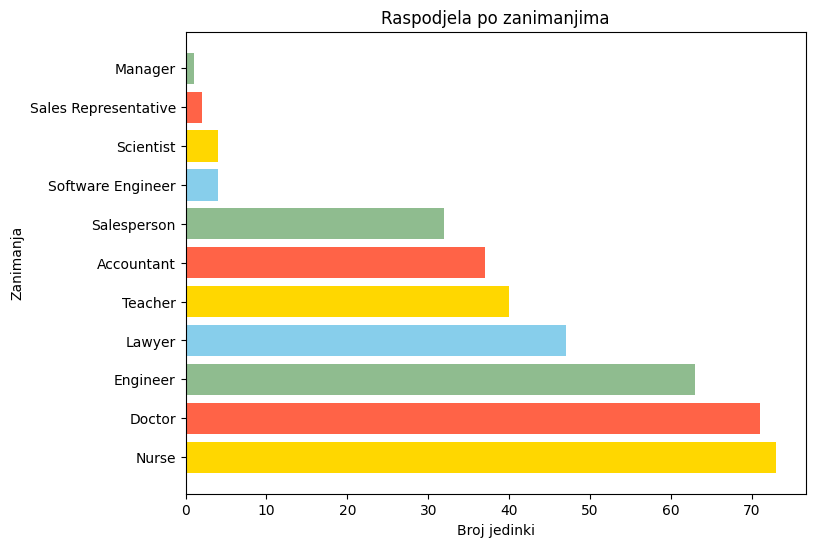

In [ ]:
category_counts = dataset['Occupation'].value_counts()
category_counts = category_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

colors = ['gold', 'tomato', 'darkseagreen', 'skyblue']

plt.barh(category_counts.index, category_counts.values, color=colors)

plt.xlabel('Broj jedinki')
plt.ylabel('Zanimanja')
plt.title('Raspodjela po zanimanjima')

plt.show()

Dalje, posmatramo jo≈° jedan izuzetno bitan atribut koji ima veliki potencijal za daljnje analize, a to je prisustvo poremeƒáaja spavanja kod ispitanika. Analizom podataka, otkrivamo da iako mnogi ispitanici nemaju takve probleme, vi≈°e od polovine njih izvje≈°tava o prisustvu poremeƒáaja poput insomnije ili apnee u snu.
Ova saznanja su izuzetno vrijedna jer poremeƒáaji spavanja mogu znaƒçajno utjecati na kvalitet ≈æivota ispitanika. Visok postotak ispitanika koji se suoƒçavaju s ovim problemima nas upuƒáuje na va≈ænost dodatnih analiza i istra≈æivanja u ovom podruƒçju.


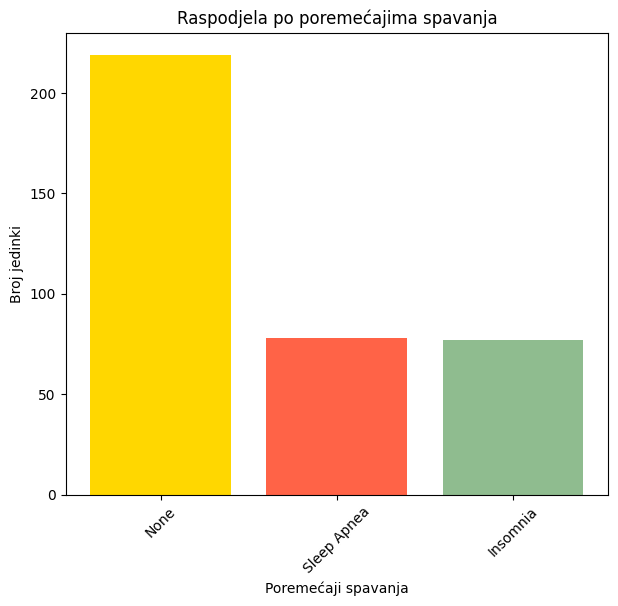

In [ ]:
category_counts = dataset['Sleep Disorder'].value_counts()
category_counts = category_counts.sort_values(ascending=False)
plt.figure(figsize=(7, 6))

colors = ['gold', 'tomato', 'darkseagreen']
plt.bar(category_counts.index, category_counts.values, color=colors)

plt.xlabel('Poremeƒáaji spavanja')
plt.ylabel('Broj jedinki')
plt.title('Raspodjela po poremeƒáajima spavanja')

plt.xticks(rotation=45)

plt.show()

Bitno je ispitati kakav uticaj imaju poremeƒáaji sna s njegovim trajanjem. Na x osi su kategorije poremeƒáaja a na y osi trajanje sna. Svaki box predstavlja raspodjelu sna za taƒçno taj tip poremeƒáaja.
Na ovaj naƒçin mo≈æemo da vidimo eventualno odstupanje ili ekstremne vrijednosti u trajanju sna za svaku kategoriju.
Vidimo da je naj≈°ira raspodjela za apneju. Ova ≈°ira raspodjela mo≈æe ukazivati na razliƒçite razine ozbiljnosti poremeƒáaja i individualne varijacije u trajanju sna meƒëu osobama s apnejom.

Na temelju prikazanog box plot-a, primjeƒáujemo da je medijan kvalitete sna najni≈æi za kategoriju Insomnia. To sugerira da osobe s dijagnozom insomnia imaju opƒáenito ni≈æu kvalitetu sna u usporedbi s drugim tipovima poremeƒáaja spavanja ili osobama koje nemaju poremeƒáaj spavanja.
Ni≈æi medijan kvalitete sna kod osoba s insomnijom mo≈æe ukazivati na ƒçe≈°ƒáe probleme sa spavanjem, pote≈°koƒáe u postizanju dubokog i kvalitetnog sna te moguƒáe nuspojave kao ≈°to su umor ili nedostatak energije tokom dana.
Ovi rezultati nagla≈°avaju potrebu za dodatnim praƒáenjem i lijeƒçenjem insomnije i apneje kako bi se pobolj≈°ala kvaliteta sna i opƒáe dobrobit osoba koje pate od ovih poremeƒáaja.

In [ ]:
df_sleep = dataset[['Sleep Duration', 'Quality of Sleep', 'Sleep Disorder']]
df_sleep = df_sleep.dropna()

fig = px.box(df_sleep, x='Sleep Disorder', y='Sleep Duration', color='Sleep Disorder', title='Impact of Sleep Disorders on Sleep Duration', labels={'Sleep Disorder': 'Sleep Disorder', 'Sleep Duration': 'Sleep Duration'})
fig.update_layout(xaxis=dict(title='Sleep Disorder'), yaxis=dict(title='Sleep Duration'))

fig.show()


Takoƒëer je bitno vidjeti kakva je zavisnost izmeƒëu starosne dobi i kvalitete sna.
Kvalitet sna igra kljuƒçnu ulogu u zdravlju i dobrobiti pojedinca, te je bitno
razumijeti kako godine mogu uticati na kvalitetu sna.
Stupci u bar plotu omoguƒáavaju da uporedimo meƒëusobno kvalitete, a crvena linija
predstavlja prosjeƒçni kvalitet sna ukljuƒçujuƒái sve grupe. Stupci iznad crvene linije imaju nadprosjeƒçni kvalitet, a ove ispod ispodprosjeƒçni.

Kroz analizu plota mo≈æemo da uoƒçimo sljedeƒáe: za razliku od moje liƒçne pretpostavke da mo≈æda starije osobe imaju lo≈°iju
kvalitetu sna uzimajuƒái u obzir porast zdravstvenih problema s godinama, iznenaƒëujuƒáe,
osobe starije starosne dobi imaju iznadprosjeƒçni kvalitet sna
(meƒëutim bitno je napomenuti da ovo nije ba≈° vjerodostojno s obzirom da nam je
najstarija starosna dob 59 a najmlaƒëa 27, trebali bi da imamo jo≈° ≈°iri spektar
za bolje zakljuƒçke). Bitno je takoƒëer naglasiti da nije starosna dob glavni faktor koji utiƒçe na kvalitet sna.


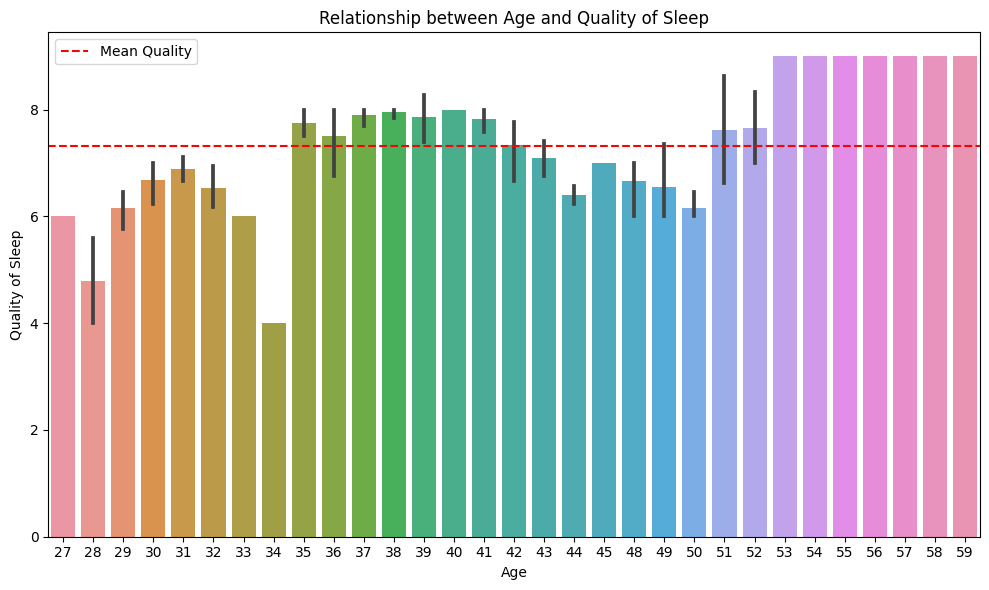

In [ ]:
df = dataset[['Age', 'Quality of Sleep']]

df = df.dropna()

plt.figure(figsize=(10, 6))

sns.barplot(x='Age', y='Quality of Sleep', data=df)

plt.xlabel('Age')
plt.ylabel('Quality of Sleep')
plt.title('Relationship between Age and Quality of Sleep')

mean_quality = df['Quality of Sleep'].mean()
plt.axhline(mean_quality, color='red', linestyle='--', label='Mean Quality')

plt.legend()
plt.tight_layout()
plt.show()

# **CHI-SQUARE TEST ZA ISPITIVANJE NEZAVISNOSTI KATEGORIJSKIH VARIJABLI**

U ovom istra≈æivanju ≈æelimo provjeriti postoji li zavisnost izmeƒëu varijable poremeƒáaja sna i varijable zanimanje. Poremeƒáaji spavanja, kao ≈°to su nesanica i apneja tokom spavanja, mogu znaƒçajno utjecati na kvalitetu sna i opƒáu dobrobit pojedinca. S druge strane, zanimanje osobe mo≈æe imati utjecaj na razliƒçite aspekte ≈æivota, ukljuƒçujuƒái stil ≈æivota, radni ritam i stres.

Iz tog razloga ƒáemo koristit chi-kvadratni test nezavisnosti. To je statistiƒçka metoda koja se koristi za ispitivanje povezanosti izmeƒëu dvije kategorijske varijable. Ovaj test poma≈æe u utvrƒëivanju postoji li znaƒçajna veza izmeƒëu varijabli ili su one nezavisne. U na≈°em sluƒçaju, ≈æelimo istra≈æiti jesu li pojedinci s odreƒëenim zanimanjem skloniji ili manje skloni razvoju poremeƒáaja spavanja.

Pristupit ƒáemo analizi tako da prvo konstruiramo kontigencijsku tablicu koja prikazuje broj promatranja u svakoj kombinaciji vrijednosti za varijable poremeƒáaj sna i zanimanje. Zatim ƒáemo primijeniti chi-kvadratni test na tu tablicu kako bismo dobili rezultate i interpretirali znaƒçajnost rezultata.

Cilj ovog istra≈æivanja je razumjeti potencijalnu povezanost izmeƒëu zanimanja i poremeƒáaja spavanja te identificirati eventualne veze koje bi mogle biti korisne za daljnje istra≈æivanje i intervencije usmjerene na pobolj≈°anje kvalitete sna i zdravlja spavanja u razliƒçitim zanimanjima.

In [ ]:
var1 = dataset["Sleep Disorder"]
var2 = dataset["Occupation"]

contingency_table = pd.crosstab(var1, var2,margins=True)
print(contingency_table)


Occupation      Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
Sleep Disorder                                                         
Insomnia                 7       3         5       2        0      3   
None                    30      64        57      42        1      9   
Sleep Apnea              0       4         1       3        0     61   
All                     37      71        63      47        1     73   

Occupation      Sales Representative  Salesperson  Scientist  \
Sleep Disorder                                                 
Insomnia                           0           29          0   
None                               0            2          2   
Sleep Apnea                        2            1          2   
All                                2           32          4   

Occupation      Software Engineer  Teacher  All  
Sleep Disorder                                   
Insomnia                        1       27   77  
None                            

Sljedeƒái korak jeste izraƒçunavanje oƒçekivane frekvencijske tablice za chi-kvadratni test nezavisnosti. Razlika izmeƒëu prethodne tablice i ove (General Observed Contingency Table i General Expected Contingency Table):

General Observed Contingency Table je tablica koja sadr≈æi stvarne frekvencije za kombinacije vrijednosti dvije kategorijske varijable.

General Expected Contingency Table je tablica koja sadr≈æi oƒçekivane frekvencije za kombinacije vrijednosti dvije kategorijskih varijabli. Oƒçekivane frekvencije se izraƒçunavaju na osnovu pretpostavke da su dvije varijable nezavisne, a koriste se marginalne frekvencije kako bi se izraƒçunala oƒçekivana frekvencija za svaku kombinaciju vrijednosti.

Ovo omoguƒáuje usporedbu stvarnih i oƒçekivanih frekvencija kako bi se odredila znaƒçajnost veze izmeƒëu varijabli.

In [ ]:
var1 = dataset["Sleep Disorder"]
var2 = dataset["Occupation"]

observed_table = pd.crosstab(var1, var2)

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
total = observed_table.sum().sum()

expected_table = np.outer(row_totals, col_totals) / total

expected_table = pd.DataFrame(expected_table, index=observed_table.index, columns=observed_table.columns)

print(expected_table)

Occupation      Accountant     Doctor   Engineer     Lawyer   Manager  \
Sleep Disorder                                                          
Insomnia          7.617647  14.617647  12.970588   9.676471  0.205882   
None             21.665775  41.574866  36.890374  27.521390  0.585561   
Sleep Apnea       7.716578  14.807487  13.139037   9.802139  0.208556   

Occupation          Nurse  Sales Representative  Salesperson  Scientist  \
Sleep Disorder                                                            
Insomnia        15.029412              0.411765     6.588235   0.823529   
None            42.745989              1.171123    18.737968   2.342246   
Sleep Apnea     15.224599              0.417112     6.673797   0.834225   

Occupation      Software Engineer    Teacher  
Sleep Disorder                                
Insomnia                 0.823529   8.235294  
None                     2.342246  23.422460  
Sleep Apnea              0.834225   8.342246  


In [ ]:
chi2 = np.sum((observed_table - expected_table)**2 / expected_table)

# Izraƒçunavanje stepeni slobode
df = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)

# Izraƒçunavanje p-vrijednosti
p_value = 1 - stats.chi2.cdf(chi2, df)

# Ispis rezultata
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", df)
print("p-value:", p_value)

Chi-square statistic: Occupation
Accountant               10.972603
Doctor                   29.217291
Engineer                 27.075301
Lawyer                   18.427140
Manager                   0.707763
Nurse                   173.900836
Sales Representative      7.589744
Salesperson              96.015096
Scientist                 2.502634
Software Engineer         1.056751
Teacher                  53.897596
dtype: float64
Degrees of freedom: 20
p-value: [9.46929927e-01 8.35681761e-02 1.33158708e-01 5.59292681e-01
 1.00000000e+00 0.00000000e+00 9.94252772e-01 6.46183107e-12
 9.99999164e-01 1.00000000e+00 5.99048543e-05]


Veƒáe vrijednosti chi-kvadratne statistike ukazuju na veƒáu zavisnost izmeƒëu zanimanja i varijable koja se prouƒçava.

P-vrijednost: P-vrijednost predstavlja vjerojatnost da se dobije chi-kvadratna statistika jednaka ili veƒáa od one koju smo posmatrali, prema pretpostavci da je nulta hipoteza istinita. Manje p-vrijednosti ukazuju na statistiƒçki znaƒçajne rezultate.

Na temelju p-vrijednosti, mo≈æemo zakljuƒçiti sljedeƒáe:

Za zanimanja s visokim p-vrijednostima (bliskim 1), poput Accountant, Engineer, Lawyer, i Sales Representative, ne mo≈æemo odbaciti nultu hipotezu. To znaƒçi da nema dovoljno dokaza da postoji statistiƒçki znaƒçajna veza izmeƒëu tih zanimanja i varijable Sleep Disorder.

Za zanimanja s niskim p-vrijednostima (bliskim 0), poput Doctor, Nurse, Salesperson, Teacher, i Software Engineer, mo≈æemo odbaciti nultu hipotezu. To ukazuje na statistiƒçki znaƒçajnu vezu izmeƒëu tih zanimanja i varijable Sleep Disorder.

Na kraju koristeƒái test statistike, stepen slobode, alpha te kritiƒçne vrijednosti dolazimo do sljedeƒáeg zakljuƒçka.

In [ ]:
alpha = 0.05
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi2 > critical_value:
    print("Odbacujemo nultu hipotezu. Postoji statistiƒçki znaƒçajna veza izmeƒëu varijabli.")
else:
    print("Prihvaƒáamo nultu hipotezu. Nema statistiƒçki znaƒçajne veze izmeƒëu varijabli.")

Odbacujemo nultu hipotezu. Postoji statistiƒçki znaƒçajna veza izmeƒëu varijabli.


Sljedeƒáe ispitujemo zavisnost indeksa tjelesne mase i spola.
Razlog za≈°to smo odabrali istra≈æiti povezanost izmeƒëu kategorija indeksa tjelesne mase i spola ispitanika je na≈° interes za razumijevanje kako se BMI kategorije raspodjeljuju meƒëu razliƒçitim spolovima. ≈Ωeljeli sam saznati ima li razlika u raspodjeli BMI kategorija izmeƒëu mu≈°karaca i ≈æena te kako spol mo≈æe utjecati na zdravstveno stanje i prehrambene navike.

BMI mi je poznat kao va≈æna mjera koja se koristi u procjeni tjelesne kompozicije i rizika za razliƒçite zdravstvene probleme. Zanimljivo je istra≈æiti kako se ta mjera razlikuje izmeƒëu mu≈°karaca i ≈æena te kako bi spol mogao biti faktor koji utiƒçe na razliƒçite kategorije BMI.

Postupak je isti kao u prethodnom ispitivanju te zbog toga neƒáemo toliko detaljno obja≈°njavati.

In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Gender"]

contingency_table = pd.crosstab(var1, var2,margins=True)
print(contingency_table)

Gender         Female  Male  All
BMI Category                    
Normal             64   131  195
Normal Weight      14     7   21
Obese               1     9   10
Overweight        106    42  148
All               185   189  374


Sljedeƒái korak jeste izraƒçunavanje oƒçekivane frekvencijske tablice za chi-kvadrat test nezavisnosti. Razlika izmedju prethodne tablice i ove (General Observed Contingency Table i General Expected Contingency Table):

In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Gender"]

observed_table = pd.crosstab(var1, var2)

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
total = observed_table.sum().sum()

expected_table = np.outer(row_totals, col_totals) / total

expected_table = pd.DataFrame(expected_table, index=observed_table.index, columns=observed_table.columns)

print(expected_table)

Gender            Female       Male
BMI Category                       
Normal         96.457219  98.542781
Normal Weight  10.387701  10.612299
Obese           4.946524   5.053476
Overweight     73.208556  74.791444


In [ ]:
chi2 = np.sum((observed_table - expected_table)**2 / expected_table)

# Izraƒçunavanje stepeni slobode
df = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)

# Izraƒçunavanje p-vrijednosti
p_value = 1 - stats.chi2.cdf(chi2, df)

# Ispis rezultata
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", df)
print("p-value:", p_value)

Chi-square statistic: Gender
Female    30.014380
Male      29.379155
dtype: float64
Degrees of freedom: 3
p-value: [1.37047842e-06 1.86401595e-06]


Odavdje zakljuƒçujemo:

Za spol "Female": Chi-kvadrat statistika iznosi 30.014380, ≈°to ukazuje na statistiƒçki znaƒçajnu vezu izmeƒëu spola "Female" i promatrane varijable. P-vrijednost od 1.37047842e-06 je izuzetno mala, ≈°to znaƒçi da je vrlo mala vjerovatnoƒáa da se takvi rezultati dobiju sluƒçajno ako nema stvarne veze izmeƒëu spola "Female" i promatrane varijable.

Za spol "Male": Chi-kvadrat statistika iznosi 29.379155, takoƒëer ukazujuƒái na statistiƒçki znaƒçajnu vezu izmeƒëu spola "Male" i promatrane varijable. P-vrijednost od 1.86401595e-06 je takoƒëer vrlo mala, ≈°to implicira da je vrlo malo vjerojatno da se takvi rezultati dobiju sluƒçajno ako nema stvarne veze izmeƒëu spola "Male" i promatrane varijable.

U oba sluƒçaja, statistiƒçki test sugerira da postoji znaƒçajna veza izmeƒëu spola ispitanika i promatrane varijable.

Ali ƒáemo ipak jo≈° ispitati preko test statistike:

In [ ]:
alpha = 0.05
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi2 > critical_value:
    print("Odbacujemo nultu hipotezu. Postoji statistiƒçki znaƒçajna veza izmeƒëu varijabli.")
else:
    print("Prihvaƒáamo nultu hipotezu. Nema statistiƒçki znaƒçajne veze izmeƒëu varijabli.")

Odbacujemo nultu hipotezu. Postoji statistiƒçki znaƒçajna veza izmeƒëu varijabli.


Na kraju smo odabrali da testiramo povezanost izmeƒëu BMI kategorija i prisutnosti poremeƒáaja spavanja.

Indeks tjelesne mase (BMI) je mjera koja se koristi za procjenu tjelesne mase u odnosu na visinu. Ova kategorizacija omoguƒáuje podjelu ispitanika u razliƒçite kategorije poput "Normalne", "Gojazne" itd. BMI se ƒçesto koristi kao indikator opƒáeg zdravlja i tjelesne kompozicije.

S druge strane, poremeƒáaji spavanja su medicinski problemi koji utiƒçu na kvalitetu i raspored spavanja. Mogu se manifestirati kao pote≈°koƒáe s uspavljivanjem, odr≈æavanjem sna ili kao abnormalni obrasci spavanja. Oni mogu biti povezani s razliƒçitim zdravstvenim stanjima kao ≈°to su srƒçane bolesti, dijabetes, depresija..

S obzirom na prirodu ove dvije varijable, postoji osnovna pretpostavka da postoji povezanost izmeƒëu BMI kategorija i poremeƒáaja spavanja. Na primjer, gojaznost i poremeƒáaji spavanja mogu biti povezani jer gojaznost mo≈æe dovesti do problema s disanjem tokom spavanja kao ≈°to je opstruktivna apneja.

In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Sleep Disorder"]

contingency_table = pd.crosstab(var1, var2,margins=True)
print(contingency_table)

Sleep Disorder  Insomnia  None  Sleep Apnea  All
BMI Category                                    
Normal                 7   183            5  195
Normal Weight          2    17            2   21
Obese                  4     0            6   10
Overweight            64    19           65  148
All                   77   219           78  374


In [ ]:
var1 = dataset["BMI Category"]
var2 = dataset["Sleep Disorder"]

observed_table = pd.crosstab(var1, var2)

row_totals = observed_table.sum(axis=1)
col_totals = observed_table.sum(axis=0)
total = observed_table.sum().sum()

expected_table = np.outer(row_totals, col_totals) / total

expected_table = pd.DataFrame(expected_table, index=observed_table.index, columns=observed_table.columns)

print(expected_table)

Sleep Disorder   Insomnia        None  Sleep Apnea
BMI Category                                      
Normal          40.147059  114.184492    40.668449
Normal Weight    4.323529   12.296791     4.379679
Obese            2.058824    5.855615     2.085561
Overweight      30.470588   86.663102    30.866310


In [ ]:
chi2 = np.sum((observed_table - expected_table)**2 / expected_table)

# Izraƒçunavanje stepeni slobode
df = (observed_table.shape[0] - 1) * (observed_table.shape[1] - 1)

# Izraƒçunavanje p-vrijednosti
p_value = 1 - stats.chi2.cdf(chi2, df)

# Ispis rezultata
print("Chi-square statistic:", chi2)
print("Degrees of freedom:", df)
print("p-value:", p_value)

Chi-square statistic: Sleep Disorder
Insomnia        67.341822
None           101.956136
Sleep Apnea     77.670205
dtype: float64
Degrees of freedom: 6
p-value: [1.43274281e-12 0.00000000e+00 1.07691633e-14]


Vi≈°e vrijednosti Chi-kvadrata ukazuju na veƒáe odstupanje od oƒçekivanog, ≈°to mo≈æe sugerirati postojanje veze izmeƒëu varijabli.

p-vrijednosti: Dobili smo sljedeƒáe p-vrijednosti:

Insomnia: 1.43274281e-12 (vrlo mala vrijednost)
None: 0.00000000e+00 (vrlo mala vrijednost)
Sleep Apnea: 1.07691633e-14 (vrlo mala vrijednost)

P-vrijednost predstavlja vjerovatnoƒáu da se dobije odstupanje jednakog ili veƒáeg od onog koje smo promatrali, ako je nulta hipoteza (nema veze izmeƒëu varijabli) istinita. Vrlo male p-vrijednosti ukazuju na to da postoji statistiƒçki znaƒçajna veza izmeƒëu BMI kategorija i prisutnosti poremeƒáaja spavanja.

To sugerira da je vjerovatnoƒáa da je veza izmeƒëu ovih dviju varijabli stvarna, a ne rezultat sluƒçajnosti.

Meƒëutim ovo ƒáemo ispitat uz test statistiku:


In [ ]:
alpha = 0.05
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
critical_value = stats.chi2.ppf(1 - alpha, df)

if chi2 > critical_value:
    print("Odbacujemo nultu hipotezu. Postoji statistiƒçki znaƒçajna veza izmeƒëu varijabli.")
else:
    print("Prihvaƒáamo nultu hipotezu. Nema statistiƒçki znaƒçajne veze izmeƒëu varijabli.")

Odbacujemo nultu hipotezu. Postoji statistiƒçki znaƒçajna veza izmeƒëu varijabli.


# **PROVJERA NORMALNE DISTRIBUCIJE PODATAKA**

Slejedeƒái zadatak je bio da se za svaku numeriƒçku varijablu provjeri da li prati normalnu distribuciju koristeƒái nekoliko metoda: Kolmogorov‚ÄìSmirnov i Shapiro‚ÄìWilk statistiƒçke testove, i QQ-plot kao grafiƒçki test. Testiranje ove osobine je izuzetno va≈æno za dalju analizu dataseta jer nam pokazuje da li se mo≈æe primijeniti aproksimacija nasumiƒçne varijable normalne distribucije u raƒçunanju intervala pouzdanosti i kritiƒçnih regiona u sklopu postavljanja i ispitivanja hipoteza. U datasetu imamo 9 numeriƒçkih varijabli ako se uzmu u obzir razdvojeni sistoliƒçki i dijastoliƒçki pritisak.

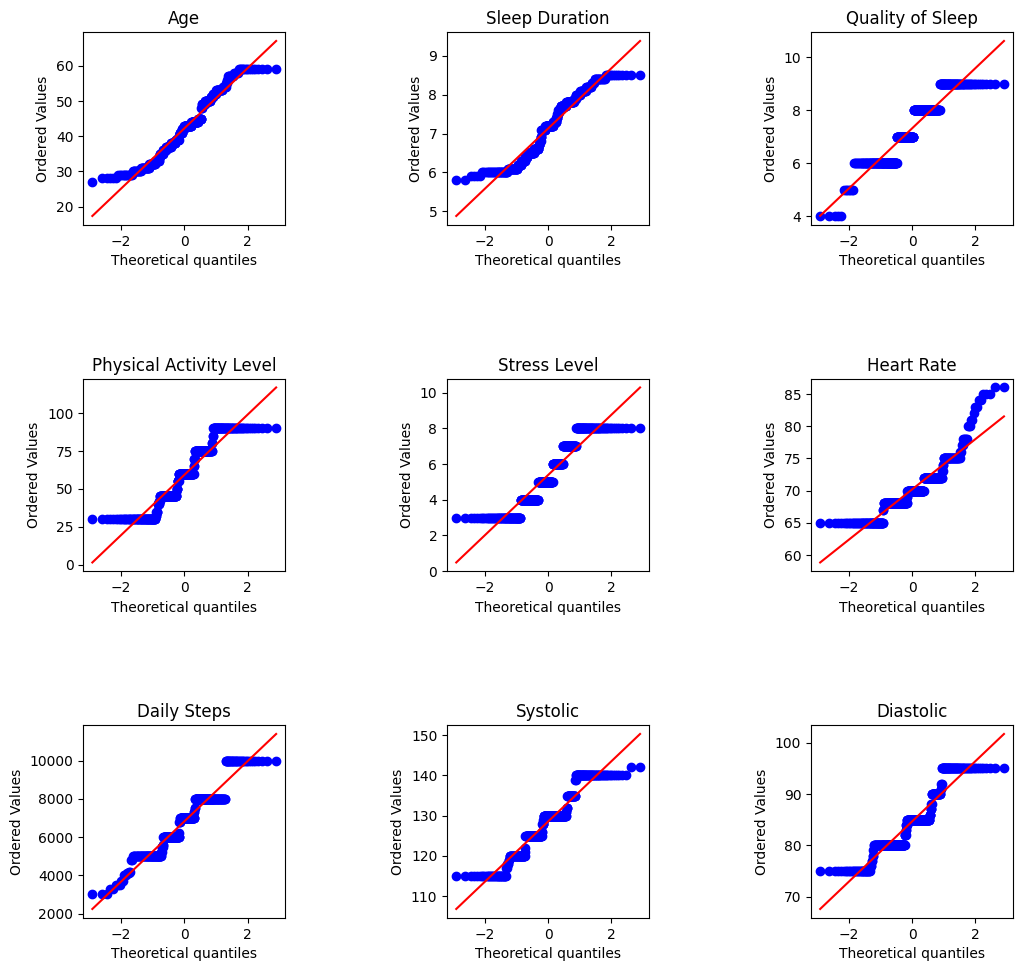

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

Blood_Pressure = dataset['Blood Pressure'].values.astype(str)
Systolic, Diastolic = [], []
for idx,val in enumerate(Blood_Pressure):
    Systolic.append(int(str(val).split('/')[0]))
    Diastolic.append(int(str(val).split('/')[1]))

dataset = dataset.drop('Blood Pressure',axis=1)
dataset.insert(7,'Systolic',Systolic)
dataset.insert(8,'Diastolic',Diastolic)
dataset

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]
fig, axs = plt.subplots(3, 3, figsize=(12, 11.5))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

# Iterate over pairs of parameters

for i, ax in enumerate(axs.flat):
    probplot(dataset[numeric[i]], plot=axs[int(i/3), i%3])
    ax.set_title(numeric[i])

plt.show()

In [ ]:
import scipy.stats as stats

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]

for var in numeric:
    data = dataset[var]
    print(f"Varijabla: {var}")

    # Perform Kolmogorov-Smirnov test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    print(f"Kolmogorov-Smirnov test - KS statistika: {ks_stat}, p-vrijednost: {ks_p_value}")

    # Perform Shapiro-Wilk test
    shapiro_stat, shapiro_p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk test - W statistika: {shapiro_stat}, p-vrijednost: {shapiro_p_value}")

    print()  # Add a new line between variables


Varijabla: Age
Kolmogorov-Smirnov test - KS statistika: 1.0, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.9580035209655762, p-vrijednost: 7.4213430956149296e-09

Varijabla: Sleep Duration
Kolmogorov-Smirnov test - KS statistika: 0.999999996684254, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.9357648491859436, p-vrijednost: 1.2668722841613356e-11

Varijabla: Quality of Sleep
Kolmogorov-Smirnov test - KS statistika: 0.9999683287581669, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.8938649892807007, p-vrijednost: 1.882131560996289e-15

Varijabla: Physical Activity Level
Kolmogorov-Smirnov test - KS statistika: 1.0, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.8994297385215759, p-vrijednost: 5.178644243031966e-15

Varijabla: Stress Level
Kolmogorov-Smirnov test - KS statistika: 0.9986501019683699, p-vrijednost: 0.0
Shapiro-Wilk test - W statistika: 0.8908881545066833, p-vrijednost: 1.1121582831513958e-15

Varijabla: Heart Rate
Kolmogorov-Smirnov test - KS

ZAKLJUƒåAK:
Iako se ƒçini da QQ-plot ukazuje na normalnu distribuciju, mo≈æe doƒái do problema zbog preklapanja taƒçaka podataka i pristranosti gustine prema odreƒëenim vrijednostima. Takoƒëer je malo te≈æe analizirati plot kada su u pitanju diskretne vrijednosti. Graniƒçne vrijednosti u donje lijevog uglu i gornjem desnogm uglu grafova su prete≈æno oni koji odstupaju.

Koristeƒái Shapiro-Wilkov test, ƒçini se da nijedan od parametara ne prati normalnu distribuciju.  Ovdje mo≈æe biti problem s gustinom odreƒëenih taƒçaka podataka. Uprkos ovim problemima, ƒçini se da neke distribucije, kao ≈°to je Age(starost), aproksimiraju normalnu distribuciju.
≈†to se tiƒçe Kolmogorov-Smirnov testa, i on nam daje pribli≈æno iste podatke kao i Shapiro test. Za dalji proraƒçun uzet ƒáemo u obzir da su numeriƒçke varijable u datasetu aproksimalno normalno distribuirane.

# **ESTIMACIJA INTERVALA POUZDANOSTI SREDNJE VRIJEDNOSTI**

Interval pouzdanosti je opseg vrijednosti koji daje procjenu stvarnog parametra populacije, kao ≈°to je srednja vrijednost, na osnovu uzorka iz te populacije.

Prilikom izraƒçunavanja intervala pouzdanosti za srednju vrijednost skupa podataka, obiƒçno se koriste srednja vrijednost uzorka i standardna gre≈°ka estimacije (kraƒái naziv za koliƒçnik standardne devijacije i korijena veliƒçine uzorka) kao kljuƒçne komponente.

Kritiƒçna vrijednost zavisi od ≈æeljenog nivoa pouzdanosti, koji se ƒçesto izra≈æava u procentima. Uobiƒçajeni izbori su 90%, 95% ili 99% intervali pouzdanosti. Kritiƒçna vrijednost se odreƒëuje na osnovu distribucije podataka i odabranog nivoa pouzdanosti. Na primjer, ako pretpostavimo normalnu distribuciju i ≈æelimo interval pouzdanosti od 95%, kritiƒçna vrijednost bi se obiƒçno dobila iz tabele ili bi se izraƒçunala pomoƒáu nekog softvera.

Izraƒçunavanjem intervala pouzdanosti, mo≈æemo dati opseg unutar kojeg smo sigurni da se prava populacija nalazi. Na primjer, interval pouzdanosti od 95% znaƒçi da ako biste ponovili proces uzorkovanja mnogo puta, otprilike 95% izraƒçunatih intervala bi sadr≈æavalo pravu srednju vrijednost populacije.

Va≈æno je napomenuti da interval pouzdanosti pru≈æa procjenu opsega vjerodostojnih vrijednosti za srednju vrijednost populacije, ali **ne garantuje** da prava srednja vrijednost populacije spada u taj raspon.


Sada preƒëimo na odreƒëivanje intervala pouzdanosti za numeriƒçke varijable na≈°eg seta podataka.

Meƒëutim, prije nego preƒëemo na izradu zadatka, neophodno je izvr≈°iti par provjera i korekcija u setu podataka.



In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


dataset.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Systolic  Diastolic  \
0                 6                       42       126         83   
1                 6                       60       125         80   
2                 6                       60       125         80   
3                 4                       30       140         90   
4                 4                       30       140         90   

   Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder age_group  
0             6   Overweight          77         4200           None     20-29  
1             8       Normal          75        10000           None     20-29  
2             8       Normal          75        10000           None     20-29  
3             8        Obese          85         3000    Sleep Apnea     20-29  
4             8        Obese          85         3000    Sleep Apnea     20-29

Korekcija Sleep Duration kolone, jer nema smisla da je neko spavao 7 sati i 80 minuta. Svaki iznos preko 60 minuta se treba korigovati.

Prikaz svih jedinstvenih vrijednosti Sleep Duration, tako da mo≈æemo vidjeti da su neophodne korekcije.

In [ ]:
np.unique(dataset['Sleep Duration'])

array([5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5])

Sada kada smo korigovali da sve vrijednosti budu u "normalnom" opsegu sati, najbolje bi bilo razdvojiti vrijednosti sati i minuta na dvije razliƒçite kolone.

In [ ]:
Updated_Sleep_Duration = []
for idx,val in enumerate(dataset['Sleep Duration']):
    Updated_Duration_Temp = val
    Hours,Minutes = int(str(val).split('.')[0]),int(str(val).split('.')[1])
    if Minutes > 6:
        Minutes = Minutes - 6
        Hours = Hours + 1
        Updated_Duration_Temp = Hours + Minutes
    Updated_Sleep_Duration.append(Updated_Duration_Temp)

dataset['Sleep Duration'] = Updated_Sleep_Duration
dataset

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             9.0   
4            5    Male   28  Sales Representative             9.0   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Systolic  Diastolic  \
0                   6                       42       126         83   
1                   6                       60       125         80   
2                   6                       60       125         80   
3                   4                       30       140         90   
4                   4                       30       140         90   
..                ...                      ...       ...        ...   
369                 9                       75       140         95   
370                 9                       75       140         95   
371                 9                       75       140         95   
372                 9                       75       140         95   
373                 9                       75       140         95   

     Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder  \
0               6   Overweight          77         4200           None   
1               8       Normal          75        10000           None   
2               8       Normal          75        10000           None   
3               8        Obese          85         3000    Sleep Apnea   
4               8        Obese          85         3000    Sleep Apnea   
..            ...          ...         ...          ...            ...   
369             3   Overweight          68         7000    Sleep Apnea   
370             3   Overweight          68         7000    Sleep Apnea   
371             3   Overweight          68         7000    Sleep Apnea   
372             3   Overweight          68         7000    Sleep Apnea   
373             3   Overweight          68         7000    Sleep Apnea   

    age_group  
0       20-29  
1       20-29  
2       20-29  
3       20-29  
4       20-29  
..        ...  
369     50-59  
370     50-59  
371     50-59  
372     50-59  
373     50-59  

[374 rows x 15 columns]

In [ ]:
Sleep_Duration = dataset['Sleep Duration'].values.astype(str)
Sleep_Hours, Sleep_Minutes = [], []
for idx,val in enumerate(Sleep_Duration):
    Hours,Minutes = int(str(val).split('.')[0]),int(str(val).split('.')[1])
    Sleep_Hours.append(Hours)
    Sleep_Minutes.append(Minutes*10)

dataset = dataset.drop('Sleep Duration',axis=1)
dataset.insert(3,'Sleep Hours',Sleep_Hours)
dataset.insert(4,'Sleep Minutes',Sleep_Minutes)
dataset

Person ID  Gender  Age  Sleep Hours  Sleep Minutes            Occupation  \
0            1    Male   27            6             10     Software Engineer   
1            2    Male   28            6             20                Doctor   
2            3    Male   28            6             20                Doctor   
3            4    Male   28            9              0  Sales Representative   
4            5    Male   28            9              0  Sales Representative   
..         ...     ...  ...          ...            ...                   ...   
369        370  Female   59            8             10                 Nurse   
370        371  Female   59            8              0                 Nurse   
371        372  Female   59            8             10                 Nurse   
372        373  Female   59            8             10                 Nurse   
373        374  Female   59            8             10                 Nurse   

     Quality of Sleep  Physical Activity Level  Systolic  Diastolic  \
0                   6                       42       126         83   
1                   6                       60       125         80   
2                   6                       60       125         80   
3                   4                       30       140         90   
4                   4                       30       140         90   
..                ...                      ...       ...        ...   
369                 9                       75       140         95   
370                 9                       75       140         95   
371                 9                       75       140         95   
372                 9                       75       140         95   
373                 9                       75       140         95   

     Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder  \
0               6   Overweight          77         4200           None   
1               8       Normal          75        10000           None   
2               8       Normal          75        10000           None   
3               8        Obese          85         3000    Sleep Apnea   
4               8        Obese          85         3000    Sleep Apnea   
..            ...          ...         ...          ...            ...   
369             3   Overweight          68         7000    Sleep Apnea   
370             3   Overweight          68         7000    Sleep Apnea   
371             3   Overweight          68         7000    Sleep Apnea   
372             3   Overweight          68         7000    Sleep Apnea   
373             3   Overweight          68         7000    Sleep Apnea   

    age_group  
0       20-29  
1       20-29  
2       20-29  
3       20-29  
4       20-29  
..        ...  
369     50-59  
370     50-59  
371     50-59  
372     50-59  
373     50-59  

[374 rows x 16 columns]

Sada prelazimo na proraƒçun intervala pouzdanosti za numeriƒçke varijable na≈°eg seta podataka (naravno bez Person ID, jer to nema ni smisla raditi).

Prvo ƒáemo odrediti naravno standardnu devijaciju, srednju vrijednost, veliƒçinu uzorka (ili populacije, vidjet ƒáemo kasnije) i vrijednost t statistike za 95% pouzdanosti. Ovdje ƒáemo prihvatiti ƒçinjenicu da je ovo samo uzorak pa smo zvog toga koristili t statistiku.

In [ ]:
All_Numerical_Columns = dataset.select_dtypes(exclude=['object']).columns
All_Numerical_Columns

Index(['Person ID', 'Age', 'Sleep Hours', 'Sleep Minutes', 'Quality of Sleep',
       'Physical Activity Level', 'Systolic', 'Diastolic', 'Stress Level',
       'Heart Rate', 'Daily Steps', 'age_group'],
      dtype='object')

In [ ]:
columns = [ 'Age', 'Sleep Hours', 'Sleep Minutes', 'Quality of Sleep', 'Systolic', 'Diastolic',
           'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

sample_data = dataset[columns]

sample_mean = sample_data.mean()

sample_std = sample_data.std()

sample_size = len(sample_data)

standard_error = sample_std / np.sqrt(sample_size)

t_score = stats.t.ppf(0.975, df=sample_size - 1)

margin_of_error = t_score * standard_error

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

confidence_intervals = pd.DataFrame({
                                     'Lower Bound': lower_bound.round(5),
                                     'Upper Bound': upper_bound.round(5)})

print(confidence_intervals)

                         Lower Bound  Upper Bound
Age                         41.30263     43.06635
Sleep Hours                  7.20638      7.48346
Sleep Minutes               18.90771     23.07090
Quality of Sleep             7.19113      7.43454
Systolic                   127.76567    129.34128
Diastolic                   84.02324     85.27623
Physical Activity Level     57.05310     61.28914
Stress Level                 5.20460      5.56546
Heart Rate                  69.74527     70.58628
Daily Steps               6652.33971   6981.35013


Kao sto smo najavili sada ƒáemo pretpostaviti da je ovo populacija, po≈°to je veliƒçina ovog uzorka dovoljne veliƒçine i obaviti identiƒçan proraƒçun kao i u prethodnom sluƒçaju, samo ≈°to sada koristimo z statistiku iz razloga ≈°to sada radimo nad ƒçitavnom populacijom.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

columns = [ 'Age', 'Sleep Hours', 'Sleep Minutes', 'Quality of Sleep', 'Systolic', 'Diastolic',
           'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

population_data = dataset[columns]

population_mean = population_data.mean()

population_std = population_data.std()

population_size = len(population_data)

standard_error = population_std / np.sqrt(population_size)

z_score = stats.norm.ppf(0.975)

margin_of_error = z_score * standard_error

lower_bound = population_mean - margin_of_error
upper_bound = population_mean + margin_of_error

confidence_intervals_z = pd.DataFrame({
                                     'Lower Bound': lower_bound.round(5),
                                     'Upper Bound': upper_bound.round(5)})

print(confidence_intervals_z)


                         Lower Bound  Upper Bound
Age                         41.30549     43.06349
Sleep Hours                  7.20683      7.48301
Sleep Minutes               18.91447     23.06414
Quality of Sleep             7.19153      7.43414
Systolic                   127.76822    129.33873
Diastolic                   84.02527     85.27420
Physical Activity Level     57.05998     61.28227
Stress Level                 5.20518      5.56487
Heart Rate                  69.74664     70.58492
Daily Steps               6652.87349   6980.81635


Da bismo se uvjerili da veliƒçina gre≈°ke pri estimaciji uzorka sa populacijom u drugom sluƒçaju, izraƒçunat ƒáemo apsolutnu razliku izmedju gornje i donje granice kod t i z statistike.

In [ ]:
confidence_intervals['Absolute Difference (Lower Bound)'] = np.abs(confidence_intervals['Lower Bound'] - confidence_intervals_z['Lower Bound'])
confidence_intervals['Absolute Difference (Upper Bound)'] = np.abs(confidence_intervals['Upper Bound'] - confidence_intervals_z['Upper Bound'])

print(confidence_intervals[['Absolute Difference (Lower Bound)', 'Absolute Difference (Upper Bound)']])


                         Absolute Difference (Lower Bound)  \
Age                                                0.00286   
Sleep Hours                                        0.00045   
Sleep Minutes                                      0.00676   
Quality of Sleep                                   0.00040   
Systolic                                           0.00255   
Diastolic                                          0.00203   
Physical Activity Level                            0.00688   
Stress Level                                       0.00058   
Heart Rate                                         0.00137   
Daily Steps                                        0.53378   

                         Absolute Difference (Upper Bound)  
Age                                                0.00286  
Sleep Hours                                        0.00045  
Sleep Minutes                                      0.00676  
Quality of Sleep                                   0.00040  
Systolic    

I kao ≈°to vidimo veliƒçina greske ne prelazi vrijednost 0.6 ≈°to je jako dobro, jer ukazuje na ƒçinjenicu da je veliƒçina uzorka dovoljno velika. Kada je veliƒçina uzorka velika (obiƒçno se smatra n > 30), t-distribucija se pribli≈æava standardnoj normalnoj distribuciji (z-distribucija).

T-distribucija se koristi kada je veliƒçina uzorka mala ili kada je standardna devijacija populacije nepoznata. Ona uzima u obzir varijabilnost uvedenu procjenom standardne devijacije populacije od uzorka. S druge strane, z-distribucija se koristi kada je veliƒçina uzorka velika i standardna devijacija populacije poznata.

Kada je veliƒçina uzorka velika, t-distribucija i z-distribucija ƒáe dati sliƒçne rezultate, a razlika izmeƒëu njih postaje zanemarljiva. To se dogaƒëa jer kako se veliƒçina uzorka poveƒáava, t-distribucija se pribli≈æava obliku standardne normalne distribucije, ≈°to dovodi do sliƒçnih intervala povjerenja i statistike testa.

≈†to znaƒçi, ako je razlika izmeƒëu rezultata dobivenih kori≈°tenjem t-statistike i z-statistike skoro 0, to ukazuje da je veliƒçina uzorka dovoljno velika, a kori≈°tenje bilo kojeg pristupa ƒáe dovesti do sliƒçnih zakljuƒçaka.

#**ESTIMACIJA INTERVALA POUZDANOSTI PROPORCIJE**

In [ ]:
from statsmodels.stats.proportion import proportion_confint
import math

Estimacija intervala pouzdanosti za proporciju $p$ nam daje opseg vrijednosti unutar kojeg se oƒçekuje da ƒáe se nalaziti stvarna vrijednost parametra $p$ s odreƒëenim nivoom sigurnosti.

Da bismo odredili interval pouzdanosti proporcije za populaciju, koristimo uzorak veliƒçine $n$ (u na≈°em sluƒçaju dataset je uzorak za cijelu populaciju) i izraƒçunavamo proporciju uzorka kao $$\hat{p} = x/n$$ gdje je $x$ broj uspjeha u uzorku. Pretpostavljamo da je uzorkovana proporcija $\hat{p}$ pribli≈æno normalno distribuirana, ≈°to je u na≈°em sluƒçaju zadovoljeno.

Standardna devijacija uzorkovane proporcije $\hat{p}$ mo≈æe se izraƒçunati kao:
$$
s(\hat{p}) = \sqrt{\frac{{\hat{p} \cdot (1-\hat{p})}}{n}}
$$

Zatim koristimo standardnu normalnu distribuciju ($z$) kako bismo odredili kritiƒçne vrijednosti na osnovu ≈æeljenog nivoa pouzdanosti. Na primjer, za 95% interval pouzdanosti, koristimo $z$-vrijednost od 1.96 (≈°to oƒçitavamo iz tabele).

Konaƒçno, interval pouzdanosti za proporciju p mo≈æe se izraƒçunati kao:
$$
\hat{p} - z \cdot s(\hat{p}) < p < \hat{p} + z \cdot s(\hat{p})
$$

Dakle, ovaj interval nam pru≈æa raspon vrijednosti unutar kojeg se oƒçekuje da ƒáe se nalaziti stvarna vrijednost parametra $p$ sa sigurno≈°ƒáu 95%.

Va≈æno je napomenuti da ovaj proraƒçun vrijedi samo u sluƒçaju da je uzorak dovoljno velik $(n >= 30)$, kao i kada su instance normalno raspodjeljene. Kako su oba uslova zadovoljena za na≈° dataset, mo≈æemo smatrati estimacije validnim.

###Estimacija proporcije jedinki ≈æenskog spola u populaciji

Pronaƒëimo sada interval pouzdanosti proporcije za kategoriƒçku varijablu 'Spol' iz na≈°eg dataseta, taƒçnije proporciju za broj jedinki ≈æenskog spola.

Proraƒçun ƒáemo vr≈°iti na dva naƒçina, pozivanjem funkcije proportion_confint koja automatski raƒçuna interval pouzdanosti sa sigurno≈°ƒáu alfa (podrazumijevano 0.05) i postepeno koristeƒái prethodno navedenu formulu.

In [ ]:
count = (dataset['Gender'] == 'Female').sum()
nobs = len(dataset['Gender'])
proportion_confint(count, nobs, alpha=0.05, method='normal')

(0.4439816422428702, 0.5453231705913544)

Ovaj proraƒçun nam govori da je proporcija jedinki ≈æenskog spola populacije u intervalu (0.4439816422428702, 0.5453231705913544) sa sigurno≈°ƒáu 95%, na osnovu analize uzorka. Ovo nam takoƒëer govori da je u na≈°em datasetu priliƒçno dobra raspodjela instanci po spolu, odnosno da je oko pola dataseta mu≈°kog, a pola ≈æenskog spola. Izvr≈°imo sada proraƒçun pomoƒáu formule. Najprije moramo odrediti vrijednost proporcije uzorka (na≈°eg dataseta), ≈°to predstavlja broj jedinki ≈æenskog spola podijeljen sa ukupnim brojem instanci:

In [ ]:
p = count / nobs
print(p)

0.4946524064171123


Dalje raƒçunamo standardnu devijaciju uzorka:

In [ ]:
sd = math.sqrt(p*(1-p)/nobs)
print(sd)

0.02585290575435397


Za odabrano alfa=0.05, iz tabele normalne vjerovatnoƒáe oƒçitavamo da je $z_{\alpha/2} = 1.96$, te uvr≈°tavanjem u poƒçetnu formulu dobivamo da je interval pouzdanosti za proporciju $p$:

In [ ]:
d = p - 1.96 * sd
g = p + 1.96 * sd

print("{} < p < {}".format(d, g))

0.4439807111385785 < p < 0.545324101695646


Vidimo da smo na oba naƒçina dobili pribli≈æno iste vrijednosti intervala pouzdanosti.

###Estimacija proporcije zaposlenika medicinskog sektora u populaciji

Uradimo ovaj proraƒçun na jo≈° dva primjera, ali ovaj put sa razliƒçitim vrijednostima pouzdanosti 90% i 99%. Ispitajmo prvo u kojem intervalu se nalazi proporcija jedinki koji imaju zaposlenje u medicinskom sektoru, buduƒái da su to najzastupljenija zanimanja u na≈°em datasetu. Proraƒçun ƒáemo vr≈°iti sa sigurno≈°ƒáu od 90% da ƒáe proporcija populacije biti unutar tog intervala.

Prvo moramo objediniti zanimanja koja spadaju u ovu kategoriju, a to su 'Doctor' i 'Nurse':

In [ ]:
count1 = (dataset['Occupation'] == 'Nurse').sum() + (dataset['Occupation'] == 'Doctor').sum()
nobs1 = len(dataset['Occupation'])

print(count1)
print(nobs1)

144
374


Kada smo izraƒçunali ukupan broj zaposlenika medicinskog sektora (doktora i medicinskih sestara) u datasetu, kao i ukupan broj instanci, izraƒçunavamo proporciju uzorka i standardnu devijaciju:

In [ ]:
p1 = count1 / nobs1
print(p1)

sd1 = math.sqrt(p1*(1-p1)/nobs1)
print(sd1)

0.3850267379679144
0.025161571423858213


U ovom sluƒçaju za alfa=0.1, iz tabele normalne vjerovatnoƒáe oƒçitavamo da je $z_{\alpha/2} = 1.645$, te uvr≈°tavanjem u poƒçetnu formulu dobivamo da je interval pouzdanosti za proporciju populacije:

In [ ]:
d1 = p1 - 1.645 * sd1
g1 = p1 + 1.645 * sd1

print("{} < p < {}".format(d1, g1))

0.3436359529756677 < p < 0.42641752296016117


Dakle, kako su ovo najzastupljenija zanimanja u datasetu, oƒçekivano smo dobili da ƒáe proporcija jedinki populacije koje ƒáe raditi u ovom sektoru biti izmeƒëu 0.344 i 0.426.

###Estimacija proporcije jedinki koje po BMI spadaju u kategoriju 'pretili'

I u treƒáem sluƒçaju ispitajmo sa pouzdano≈°ƒáu 99% u kojem intervalu se nalazi proporcija jedinki iz dataseta koja po BMI spada u kategoriju 'Overweight'.

In [ ]:
count2 = (dataset['BMI Category'] == 'Overweight').sum()
nobs2 = len(dataset['BMI Category'])

print(count2)
print(nobs2)

148
374


Izraƒçunavamo proporciju i stadndardnu devijaciju:

In [ ]:
p2 = count2 / nobs2
print(p2)

sd2 = math.sqrt(p2*(1-p2)/nobs2)
print(sd2)

0.39572192513368987
0.025285856792862178


Sada za alfa=0.01 vrijedi da je $z_{\alpha/2} = 2.575$

In [ ]:
d2 = p2 - 2.575 * sd2
g2 = p2 + 2.575 * sd2

print("{} < p < {}".format(d2, g2))

0.33061084389206974 < p < 0.46083300637531


Ovo nam govori da je proporcija ljudi koji po BMI spadaju u kategoriju 'pretili' izmeƒëu 0.331 i 0.461, ≈°to svakako predstavlja zabrinjavajuƒáe podatke i osnovu za dalja ispitivanja da li i na koji naƒçin ovo mo≈æe utjecati na odreƒëene probleme i pote≈°koƒáe sa zdravljem i snom.

# **ISPITIVANJE HIPOTEZA**

Ispitivanjem hipoteza donosimo zakljuƒçke o razliƒçitim poveznicama meƒëu podacima. Postavljamo nultu hipotezu i alternativnu hipotezu. U zavisnosti od rezultata analize podataka, mo≈æemo ili imati dovoljno podataka da odbacimo nultu hipotezu u korist alternativne ili ne odbaciti poƒçetnu hipotezu. U ovom datasetu mo≈æemo istra≈æiti potencijalne veze izmeƒëu spavanja i razliƒçitih faktora poput spola, dobi, tjelesne aktivnosti...Cilj nam je razumjeti va≈ænost spavanja u kontekstu opƒáeg zdravlja i dobivanje uvida koji bi mogli pomoƒái u pobolj≈°anju naƒçina ≈æivota. Analizu mo≈æemo vr≈°iti pomoƒáu p-vrijednosti ili fiksiranog nivoa znaƒçajnosti ùù∞ i kritiƒçnog regiona. Za proraƒçun ƒáemo koristiti t-statistiku jer se sa njom omoguƒáava procjena standardne devijacije populacije pomoƒáu podataka iz uzorka.

---

**Nul hipoteza (H0)**: Ne postoji znaƒçajna razlika izmeƒëu trajanja sna mu≈°karaca i ≈æena.

**Alternativna hipoteza (H1)**: Postoji znaƒçajna razlika izmeƒëu trajanja sna mu≈°karaca i ≈æena.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Pretpostavka: dataset je DataFrame koji sadr≈æi stupce 'Gender', 'Sleep Hours' i 'Sleep Minutes'

# Podaci za mu≈°karce i ≈æene
males_sleep_hours = dataset[dataset['Gender'] == 'Male']['Sleep Hours']
males_sleep_minutes = dataset[dataset['Gender'] == 'Male']['Sleep Minutes']

females_sleep_hours = dataset[dataset['Gender'] == 'Female']['Sleep Hours']
females_sleep_minutes = dataset[dataset['Gender'] == 'Female']['Sleep Minutes']

# Izraƒçunavanje trajanja sna u minutama
males_sleep_duration = males_sleep_hours * 60 + males_sleep_minutes
females_sleep_duration = females_sleep_hours * 60 + females_sleep_minutes

# Izvr≈°avanje t-testa za nezavisne uzorke
t_statistic, p_value = ttest_ind(males_sleep_duration, females_sleep_duration)

# Ispis rezultata
print("Testiranje hipoteze 1:")
print(f"t-statistika: {t_statistic:.4f}")
print(f"p-vrijednost: {p_value:.4f}")


Testiranje hipoteze 1:
t-statistika: 2.2706
p-vrijednost: 0.0237


S obzirom da je dobijena p-vrijednost popriliƒçno niska, mo≈æemo zakljuƒçiti da je veoma mala ≈°ansa da je vjerojatnoƒáa da je razlika u trajanju sna izmeƒëu mu≈°karaca i ≈æena nastala sluƒçajno relativno niska. Samim time mo≈æemo odbaciti nultu hipotezu u korist alternativne i reƒái da postoji razlika u trajanju sna izmeƒëu ≈æena i mu≈°karaca.



---
**Nul hipoteza (H0)**: Ne postoji znaƒçajna razlika izmeƒëu kvalitete sna za osobe koje redovno vje≈æbaju i za one koje ne vje≈æbaju.

**Alternativna hipoteza (H1)**: Postoji znaƒçajna razlika izmeƒëu kvalitete sna za osobe koje redovno vje≈æbaju i za one koje ne vje≈æbaju.


In [ ]:
# Postavljanje praga za klasifikaciju tjelesne aktivnosti
activity_threshold = 50

# Dodavanje nove kolone 'Activity Classification' koja ƒáe sadr≈æavati klasifikaciju sudionika
dataset['Activity Classification'] = dataset['Physical Activity Level'].apply(lambda x: 'Active' if x >= activity_threshold else 'Less Active')
active_group = dataset[dataset['Activity Classification'] == 'Active']
less_active_group = dataset[dataset['Activity Classification'] == 'Less Active']

# Izraƒçunavanje p-vrijednosti t-testa za razliku u kvaliteti sna izmeƒëu grupa
t_statistic, p_value = ttest_ind(active_group['Quality of Sleep'], less_active_group['Quality of Sleep'], equal_var=False)

print("Testiranje hipoteze 2:")
print("t-statistika:", t_statistic)
print("P-vrijednost:", p_value)

Testiranje hipoteze 2:
t-statistika: 7.01530939668748
P-vrijednost: 2.126558924292083e-11


Kako je varijabla vezana za nivo tjelesne aktivnosti zabilje≈æena u vrijednostima od 0 do 100 odluƒçili smo staviti prag za kalsifikaciju nivoa tjelesne aktivnosti na sredinu intervala te ako je vrijednost veƒáa od 50, uzima se da je osoba dovoljno tjelesno aktivna, a ako je vrijednost manja od 50, uzima se da osoba nije dovoljno tjelesno aktivna. Vidimo da je izraƒçunata p-vrijednost ekstremno mala, ≈°to za rezultat pokazuje da postoji vrlo jasna i statistiƒçki znaƒçajna razlika u kvaliteti sna izmeƒëu aktivnih i manje aktivnih sudionika. Stoga, na temelju ovih rezultata, mo≈æemo zakljuƒçiti da postoji vrlo jaka statistiƒçka potpora za odbacivanje nulte hipoteze i prihvaƒáanje alternativne hipoteze.



---
**Nul hipoteza (H0)**: Jednaka je proporcija mu≈°karaca i ≈æena pod stresom.

**Alternativna hipoteza (H1)**: Nejednaka je proporcija mu≈°karaca i ≈æena pod stresom.


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Pretpostavka: data je DataFrame s datasetom koji sadr≈æi stupce 'Gender' i 'Stress'

# Filtriranje podataka za ≈æene i mu≈°karce ƒçija je vrijednost stresa veƒáa od 5
women_data = dataset[(dataset['Gender'] == 'Female') & (dataset['Stress Level'] > 5)]
men_data = dataset[(dataset['Gender'] == 'Male') & (dataset['Stress Level'] > 5)]

# Izraƒçunavanje broja ≈æena i mu≈°karaca pod stresom veƒáim od 5
women_stress_count = len(women_data)
men_stress_count = len(men_data)

# Izraƒçunavanje ukupnog broja ≈æena i mu≈°karaca
total_women_count = len(dataset[dataset['Gender'] == 'Female'])
total_men_count = len(dataset[dataset['Gender'] == 'Male'])

# Izvr≈°avanje testa proporcija
count = np.array([women_stress_count, men_stress_count])
nobs = np.array([total_women_count, total_men_count])

stat, p_value = proportions_ztest(count, nobs)

# Postavljanje nivoa znaƒçajnosti alfa
alfa = 0.05
critical_value_left = -1.96
critical_value_right = 1.96
# Ispis rezultata
print("Testiranje hipoteze 3:")
print(f"Z-vrijednost: {stat:.4f}")
print(f"Kriticni region: Z<{critical_value_left:.2f} i Z>{critical_value_right:.2f}")

Testiranje hipoteze 3:
Z-vrijednost: -5.6438
Kriticni region: Z<-1.96 i Z>1.96


U ovom proraƒçunu smo uzeli da je osoba pod stresom ukoliko je zabilje≈æeni level stresa veƒái od 5. Uradili smo proraƒçun proporcija pomoƒáu z-statistike kao aproksimaciju za binomijalnu raspodjelu. Kako vrijednost z-statistike spada u kritiƒçni region, mo≈æemo zakljuƒçiti da se odbacuje nulta hipoteza u korist alternativne.



---
**Nul hipoteza (H0)**: Ne postoji znaƒçajna razlika u proporciji osoba s poremeƒáajima spavanja izmeƒëu razliƒçitih starosnih grupa.

**Alternativna hipoteza (H1)**: Postoji znaƒçajna razlika u proporciji osoba s poremeƒáajima spavanja izmeƒëu razliƒçitih starosnih grupa.


In [ ]:
contingency_table = pd.crosstab(dataset['age_group'], dataset['Sleep Disorder'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Ispis rezultata
print("Testiranje hipoteze 4:")
print(f"Chi-square vrijednost: {chi2:.4f}")
print(f"P-vrijednost: {p_value:.10f}")

Testiranje hipoteze 4:
Chi-square vrijednost: 181.4348
P-vrijednost: 0.0000000000


U ovom testu koristila se chi-square statika jer omoguƒáava da utvrdimo postoji li povezanost izmeƒëu dvije kategoriƒçke varijable. Ona mjeri razliku izmeƒëu posmatranih frekvencija i oƒçekivanih frekvencija pod pretpostavkom nezavisnosti. Test zatim procjenjuje vjerovatnoƒáu opa≈æanja uoƒçenih frekvencija ako je nulta hipoteza taƒçna. Kako je p-vrijednost praktiƒçki nula, mo≈æemo odbaciit nultu hipotezu i reƒái da postoji velika razlika u proporcijama osoba s poremeƒáajima spavanja izmeƒëu razliƒçitih starosnih grupa.


#**MODEL LINEARNE REGRESIJE**

Linearna regresija nam omoguƒáava da modeliramo odnos izmeƒëu nezavisnih varijabli i zavisne varijable pomoƒáu linearne funkcije.
Cilj linearne regresije je procijeniti parametre linearne jednaƒçine koja najbolje odgovara podacima i napraviti predviƒëanja ili izvuƒái zakljuƒçke na osnovu tog modela.
Pru≈æa uvid u prirodu i snagu odnosa izmeƒëu varijabli, omoguƒáavajuƒái nam da shvatimo kako su promjene u nezavisnim varijablama povezane sa promjenama u zavisnoj varijabli. Linearna regresija nam takoƒëe omoguƒáava da kvantifikujemo uticaj nezavisnih varijabli na zavisnu varijablu i procijenimo statistiƒçku znaƒçajnost odnosa.

Da bismo odredili koje varijable imaju najbolju linearnu ovisnost, te na taj naƒçin uspostavili najbolji model linearne regresije, moramo ispitati koeficijent determinacije za svaki par varijabli.

Koeficijent determinacije, $R^2$, je statistiƒçka mjera koja predstavlja udio varijanse ovisne varijable koji se mo≈æe objasniti nezavisnim varijablama u regresijskom modelu. Drugim rijeƒçima, govori nam koliko su dvije varijable linearno ovisne.

$R^2$ vrijednost se kreƒáe izmeƒëu 0 i 1, gdje:

*   $R^2$ vrijednost 0 ukazuje da ovisna varijabla uopƒáe ne mo≈æe biti predviƒëena pomoƒáu nezavisnih varijabli u modelu.
*   $R^2$ vrijednost 1 ukazuje na savr≈°enu linearnu vezu, gdje se ovisna varijabla potpuno obja≈°njava nezavisnim varijablama u modelu (tj. meƒëu njima je savr≈°ena linearna zavisnost).

Koeficijent determinacije se ƒçesto tumaƒçi kao postotak varijanse ovisne varijable koja se mo≈æe objasniti nezavisnim varijablama. Na primjer, $R^2$ vrijednost od 0.75 znaƒçi da se 75% pona≈°anja ovisne varijable mo≈æe biti obja≈°njeno nezavisnim varijablama, dok preostalih 25% ostaje neobja≈°njeno ili je rezultat drugih faktora.

Va≈æno je napomenuti da sam $R^2$ ne pru≈æa informacije o statistiƒçkoj znaƒçajnosti ili pouzdanosti regresijskog modela, nego nam naprosto ukazuje u kojoj mjeri su varijable linearno ovisne.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def find_best_column_pair(data):
    columns = data.columns.tolist()
    excluded_columns = ['Person ID', 'Gender', 'BMI Category', 'Sleep Disorder']
    columns_to_compare = [col for col in columns if col not in excluded_columns]

    max_r2 = -np.inf
    best_pair = None

    for i in range(len(columns_to_compare)):
        for j in range(i + 1, len(columns_to_compare)):
            x = data[columns_to_compare[i]]
            y = data[columns_to_compare[j]]

            if not np.issubdtype(x.dtype, np.number) or not np.issubdtype(y.dtype, np.number):
                continue

            x = x.values.reshape(-1, 1)
            y = y.values

            regression_model = LinearRegression()
            regression_model.fit(x, y)
            y_pred = regression_model.predict(x)

            ss_total = ((y - y.mean()) ** 2).sum()
            ss_residual = ((y - y_pred) ** 2).sum()
            r2_score = 1 - (ss_residual / ss_total)

            if r2_score > max_r2:
                max_r2 = r2_score
                best_pair = (columns_to_compare[i], columns_to_compare[j])

    return best_pair, max_r2

data = data1

best_pair, max_r2 = find_best_column_pair(data)
print(f"Kolone '{best_pair[0]}' i '{best_pair[1]}' imaju najveƒái koeficijent determinacije (R^2 = {max_r2})")


Kolone 'Quality of Sleep' i 'Stress Level' imaju najveƒái koeficijent determinacije (R^2 = 0.8077552132338895)


Oƒçekivano smo dobili da je najveƒáa linearna ovisnost meƒëu varijablama 'Stress Level' i 'Quality of Sleep'. Sada, mo≈æemo preƒái na postavljanje modela linearne regresije. Najprije crtamo scatter-plot ove dvije varijable i kodiramo najbolji linearni model nad njima.

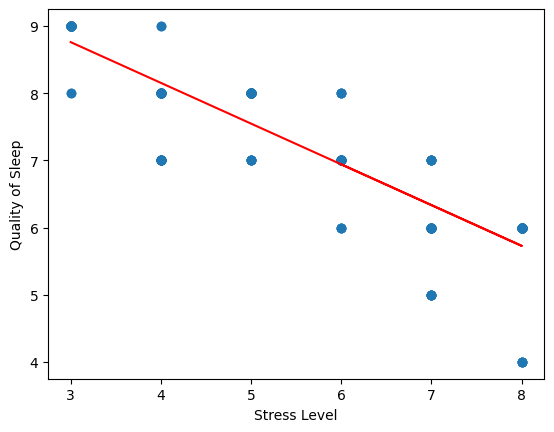

In [ ]:
import sklearn
from sklearn import linear_model

x = dataset[['Stress Level']]
y = dataset[['Quality of Sleep']]

linear = linear_model.LinearRegression()

linear.fit(x, y)

y_pred = linear.predict(x)
plt.plot(x, y_pred, color='red')

plt.scatter(x, y)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

Kako nam linearna regresija daje pravu oblika $y = ax + b$ koja najbolje odgovara na≈°im podacima, izraƒçunajmo vrijednosti koeficijenata $a$ i $b$.

In [ ]:
import numpy as np

x = dataset['Stress Level']
y = dataset['Quality of Sleep']

coefficients = np.polyfit(x, y, 1)

a = coefficients[0]  # koeficijent pravca
b = coefficients[1]  # odsjeƒçak na y-osi

print(f"Koeficijent a: {a}")
print(f"Koeficijent b: {b}")

Koeficijent a: -0.6062274064158949
Koeficijent b: 10.577385017437475


Dakle, jednaƒçina prave koja predstavlja matematiƒçki model linearne regresije varijabli 'Stress Level' i 'Quality of Sleep' iz na≈°eg dataseta je:
$$y = -0.6062274064158949x + 10.577385017437475$$

Zakljuƒçno, linearni regresijski model s jednaƒçinom $y = -0.606x + 10.577$ pokazuje sna≈ænu povezanost izmeƒëu nezavisne varijable ('Stress Level') i zavisne varijable ('Quality of Sleep'). Vrijednost $R^2$ od 0.808 ukazuje da se otprilike 80.8% varijacije zavisne varijable mo≈æe objasniti linearnom vezom s nezavisnom varijablom. Visoka vrijednost $R^2$ ukazuje da je linearni regresijski model dobro prilagoƒëen za podatke.

Nagib linije regresije je negativan, ≈°to ukazuje na suprotan trend izmeƒëu nezavisne i zavisne varijable. Kako razina stresa raste, kvaliteta sna ima tendenciju da opada.

Iako postoje odstupanja ili rasipanja taƒçki oko linije regresije, veƒáina prati pravac linije. To upuƒáuje na to da model dobro opisuje opƒái uzorak i smjer podataka. Ipak, mogu postojati faktori koji uzrokuju odstupanja pojedinih instanci od modela.

Va≈æno je napomenuti da zbog ovakvog neujednaƒçenog rasporeda taƒçaka oko linearne funkcije, pouzdanost predikcija modela mo≈æe biti ograniƒçena.